In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc và hiển thị dữ liệu
# Đọc dữ liệu từ file CSV
df = pd.read_csv('iris.csv')
# Chỉ lấy chiều dài và chiều rộng đài hoa
iris_data = df[['sepal.length', 'sepal.width', 'variety']]
print("Dữ liệu mẫu:")
display(iris_data.head())

Dữ liệu mẫu:


,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa


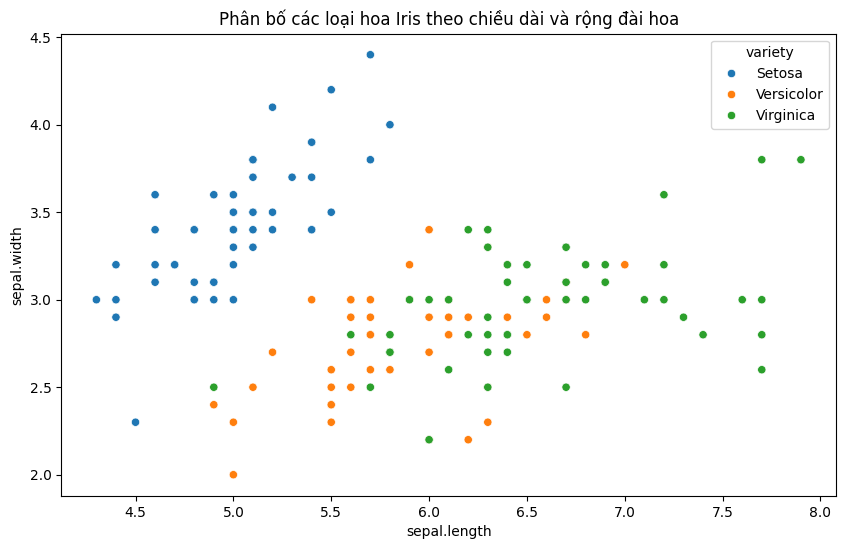

In [3]:
# Visualization để hiểu dữ liệu better (optional)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_data, x='sepal.length', y='sepal.width', hue='variety')
plt.title('Phân bố các loại hoa Iris theo chiều dài và rộng đài hoa')
plt.show()

In [4]:
# Các hàm tiện ích
def euclidean_distance(point1, point2):
    """Tính khoảng cách Euclidean giữa hai điểm"""
    return sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [5]:
# Bài 1a - Tính trung bình cộng
print("Bài 1a: Trung bình cộng chiều dài, chiều rộng đài hoa của từng loại")
means = iris_data.groupby('variety')[['sepal.length', 'sepal.width']].mean()
display(means)

Bài 1a: Trung bình cộng chiều dài, chiều rộng đài hoa của từng loại


,sepal.length,sepal.width
variety,,
Setosa,5.006,3.428
Versicolor,5.936,2.770
Virginica,6.588,2.974


In [6]:
# Bài 2a - Kích thước lớn nhất
print("Bài 2a: Chiều dài, chiều rộng đài hoa lớn nhất của từng loại")
max_dims = iris_data.groupby('variety')[['sepal.length', 'sepal.width']].max()
display(max_dims)

Bài 2a: Chiều dài, chiều rộng đài hoa lớn nhất của từng loại


,sepal.length,sepal.width
variety,,
Setosa,5.8,4.4
Versicolor,7.0,3.4
Virginica,7.9,3.8


In [7]:
# Bài 3a
def find_nearest_neighbor(input_point):
    """Tìm điểm gần nhất"""
    min_distance = float('inf')
    nearest_class = None
    
    for _, row in iris_data.iterrows():
        distance = euclidean_distance(
            (input_point[0], input_point[1]),
            (row['sepal.length'], row['sepal.width'])
        )
        if distance < min_distance:
            min_distance = distance
            nearest_class = row['variety']
    
    return nearest_class

def find_nearest_class_by_average(input_point):
    """Tính khoảng cách trung bình đến tất cả các điểm của từng loại"""
    class_distances = {}
    
    for variety in iris_data['variety'].unique():
        class_data = iris_data[iris_data['variety'] == variety]
        total_distance = 0
        
        for _, row in class_data.iterrows():
            distance = euclidean_distance(
                (input_point[0], input_point[1]),
                (row['sepal.length'], row['sepal.width'])
            )
            total_distance += distance
        
        class_distances[variety] = total_distance / len(class_data)
    
    return min(class_distances.items(), key=lambda x: x[1])[0]

# Test Bài 3a với một điểm mẫu
test_point = (5.0, 3.5)
print(f"Bài 3a: Phân loại điểm {test_point}")
print(f"a) Theo điểm gần nhất: {find_nearest_neighbor(test_point)}")
print(f"b) Theo trung bình cộng: {find_nearest_class_by_average(test_point)}")

Bài 3a: Phân loại điểm (5.0, 3.5)
a) Theo điểm gần nhất: Setosa
b) Theo trung bình cộng: Setosa


In [8]:
# Bài 1b - Top 10 chiều dài đài hoa
print("Bài 1b: Top 10 chiều dài đài hoa của mỗi loại")
for variety in iris_data['variety'].unique():
    print(f"\n{variety}:")
    lengths = iris_data[iris_data['variety'] == variety]['sepal.length'].nlargest(10)
    display(lengths)

Bài 1b: Top 10 chiều dài đài hoa của mỗi loại

Setosa:


14    5.8
15    5.7
18    5.7
33    5.5
36    5.5
5     5.4
10    5.4
16    5.4
20    5.4
31    5.4
Name: sepal.length, dtype: float64


Versicolor:


50    7.0
52    6.9
76    6.8
65    6.7
77    6.7
86    6.7
58    6.6
75    6.6
54    6.5
51    6.4
Name: sepal.length, dtype: float64


Virginica:


131    7.9
117    7.7
118    7.7
122    7.7
135    7.7
105    7.6
130    7.4
107    7.3
109    7.2
125    7.2
Name: sepal.length, dtype: float64

In [11]:
# Bài 2b - Thống kê 50 bông hoa có tổng kích thước lớn nhất
# Tạo một bản sao của DataFrame để tránh warning
iris_data_with_total = iris_data.copy()
iris_data_with_total['total'] = iris_data_with_total['sepal.length'] + iris_data_with_total['sepal.width']

# Sắp xếp theo tổng kích thước giảm dần và lấy 50 bông đầu tiên
top_50_flowers = iris_data_with_total.nlargest(50, 'total')

print("Bài 2b: Thống kê trong 50 bông hoa có tổng chiều dài + chiều rộng đài hoa lớn nhất")
print("\nSố lượng mỗi loại trong top 50:")
display(top_50_flowers['variety'].value_counts())

# Hiển thị thêm thông tin chi tiết (optional)
print("\nThông tin chi tiết về phân phối:")
display(top_50_flowers.groupby('variety').agg({
    'total': ['count', 'mean', 'min', 'max'],
    'sepal.length': 'mean',
    'sepal.width': 'mean'
}).round(2))

Bài 2b: Thống kê trong 50 bông hoa có tổng chiều dài + chiều rộng đài hoa lớn nhất

Số lượng mỗi loại trong top 50:


variety
Virginica     30
Versicolor    13
Setosa         7
Name: count, dtype: int64


Thông tin chi tiết về phân phối:


total                   sepal.length sepal.width
           count   mean  min   max         mean        mean
variety                                                    
Setosa         7   9.57  9.3  10.1         5.53        4.04
Versicolor    13   9.65  9.3  10.2         6.58        3.06
Virginica     30  10.09  9.5  11.7         6.95        3.15

In [12]:
# Bài 3b
def find_nearest_with_tiebreak(input_point):
    """Tìm điểm gần nhất với xử lý trường hợp đặc biệt"""
    distances = []
    for _, row in iris_data.iterrows():
        distance = euclidean_distance(
            (input_point[0], input_point[1]),
            (row['sepal.length'], row['sepal.width'])
        )
        distances.append((distance, row['variety']))
    
    distances.sort()
    if distances[0][0] == distances[1][0]:  # Nếu có 2 điểm cùng khoảng cách nhỏ nhất
        return distances[2][1]  # Lấy điểm kế tiếp
    return distances[0][1]

def k_nearest_neighbors(input_point, k=7):
    """7 điểm gần nhất"""
    distances = []
    for _, row in iris_data.iterrows():
        distance = euclidean_distance(
            (input_point[0], input_point[1]),
            (row['sepal.length'], row['sepal.width'])
        )
        distances.append((distance, row['variety']))
    
    distances.sort()
    k_nearest = distances[:k]
    
    class_counts = {}
    for _, variety in k_nearest:
        class_counts[variety] = class_counts.get(variety, 0) + 1
    
    max_count = max(class_counts.values())
    winners = [variety for variety, count in class_counts.items() if count == max_count]
    
    if len(winners) == 1:
        return winners[0]
    return "Không xác định được loại"

def points_in_circle(center_point, radius=2):
    """Điểm trong vòng tròn bán kính 2mm"""
    points_inside = []
    for _, row in iris_data.iterrows():
        distance = euclidean_distance(
            (center_point[0], center_point[1]),
            (row['sepal.length'], row['sepal.width'])
        )
        if distance <= radius:
            points_inside.append(row['variety'])
    
    if not points_inside:
        return "Không có điểm nào trong vòng tròn"
    
    class_counts = {}
    for variety in points_inside:
        class_counts[variety] = class_counts.get(variety, 0) + 1
    
    max_count = max(class_counts.values())
    winners = [variety for variety, count in class_counts.items() if count == max_count]
    
    if len(winners) == 1:
        return winners[0]
    return "Không xác định được loại"

# Test Bài 3b
test_point = (5.0, 3.5)
print(f"Bài 3b: Phân loại nâng cao điểm {test_point}")
print(f"a) Theo điểm gần nhất (với xử lý trường hợp đặc biệt): {find_nearest_with_tiebreak(test_point)}")
print(f"b) Theo 7 điểm gần nhất: {k_nearest_neighbors(test_point)}")
print(f"c) Theo điểm trong vòng tròn: {points_in_circle(test_point)}")

Bài 3b: Phân loại nâng cao điểm (5.0, 3.5)
a) Theo điểm gần nhất (với xử lý trường hợp đặc biệt): Setosa
b) Theo 7 điểm gần nhất: Setosa
c) Theo điểm trong vòng tròn: Setosa


In [14]:
sepal_length = float(input("Nhập chiều dài đài hoa (sepal length): "))
sepal_width = float(input("Nhập chiều rộng đài hoa (sepal width): "))
point = (sepal_length, sepal_width)

print(f"\nKết quả phân loại cho điểm {point}:")
print("Phương pháp cơ bản:")
print(f"a) Theo điểm gần nhất: {find_nearest_neighbor(point)}")
print(f"b) Theo trung bình cộng: {find_nearest_class_by_average(point)}")

print("\nPhương pháp nâng cao:")
print(f"a) Theo điểm gần nhất (với xử lý trường hợp đặc biệt): {find_nearest_with_tiebreak(point)}")
print(f"b) Theo 7 điểm gần nhất: {k_nearest_neighbors(point)}")
print(f"c) Theo điểm trong vòng tròn: {points_in_circle(point)}")


Kết quả phân loại cho điểm (2.7, 5.4):
Phương pháp cơ bản:
a) Theo điểm gần nhất: Setosa
b) Theo trung bình cộng: Setosa

Phương pháp nâng cao:
a) Theo điểm gần nhất (với xử lý trường hợp đặc biệt): Setosa
b) Theo 7 điểm gần nhất: Setosa
c) Theo điểm trong vòng tròn: Không có điểm nào trong vòng tròn
